In [20]:
#Importo todo
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import percentileofscore

In [21]:
#plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('baby.csv')
df.head(5)

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [23]:
#1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [24]:
df.shape

(1174, 7)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [26]:
df.count()

Unnamed: 0                   1174
Birth.Weight                 1174
Gestational.Days             1174
Maternal.Age                 1174
Maternal.Height              1174
Maternal.Pregnancy.Weight    1174
Maternal.Smoker              1174
dtype: int64

In [27]:
df["Maternal.Smoker"].value_counts()

False    715
True     459
Name: Maternal.Smoker, dtype: int64

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1174.0,587.500000,339.048915,1.0,294.25,587.5,880.75,1174.0
Birth.Weight,1174.0,119.462521,18.328671,55.0,108.00,120.0,131.00,176.0
Gestational.Days,1174.0,279.101363,16.010305,148.0,272.00,280.0,288.00,353.0
Maternal.Age,1174.0,27.228279,5.817839,15.0,23.00,26.0,31.00,45.0
Maternal.Height,1174.0,64.049404,2.526102,53.0,62.00,64.0,66.00,72.0
Maternal.Pregnancy.Weight,1174.0,128.478705,20.734282,87.0,114.25,125.0,139.00,250.0


In [29]:
#R:

#El df tiene 1174 filas y 7 columnas, lo que significa que hay 1174 casos de madres y bebés y 7 variables que los describen.

#La columna Unnamed: 0 es el índice de las filas, y no aporta información relevante para el análisis.

#Las otras columnas son variables numéricas o booleanas. Las variables numéricas son:
#Birth.Weight, Gestational.Days, Maternal.Age, Maternal.Height, Maternal.Pregnancy.Weight. 
#La variable booleana es Maternal.Smoker.

#El método df.describe().T muestra algunas estadísticas descriptivas de las variables numéricas,
#como la media, la desviación estándar, el mínimo, el máximo, y los cuartiles. 
#Por ejemplo, se puede ver que el peso medio de los bebés es de 119.46 onzas, con una desviación estándar de 18.32 onzas. 
#El peso mínimo es de 55.0 onzas y el máximo es de 176.0 onzas. El 50% de los bebés tienen un peso entre 108.00 y 120.0 onzas.

In [30]:
#2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? 
#Justifica tu respuesta creando los gráficos y modelos necesarios.

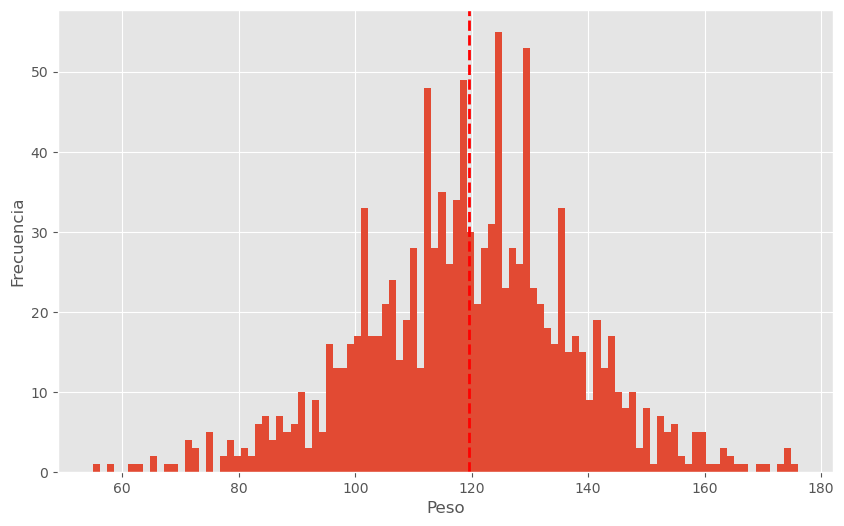

In [31]:
#Construímos un histograma.

peso=df['Birth.Weight'].dropna()
media=np.mean(peso)
plt.hist(peso, bins=100)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

In [32]:
#Podemos ver que los datos tienen distribucón normal pero, 
#lo vamos a comprobar dibujando la curva de la función de densidad de probabilidad (PDF, por sus siglas en inglés) Normal.

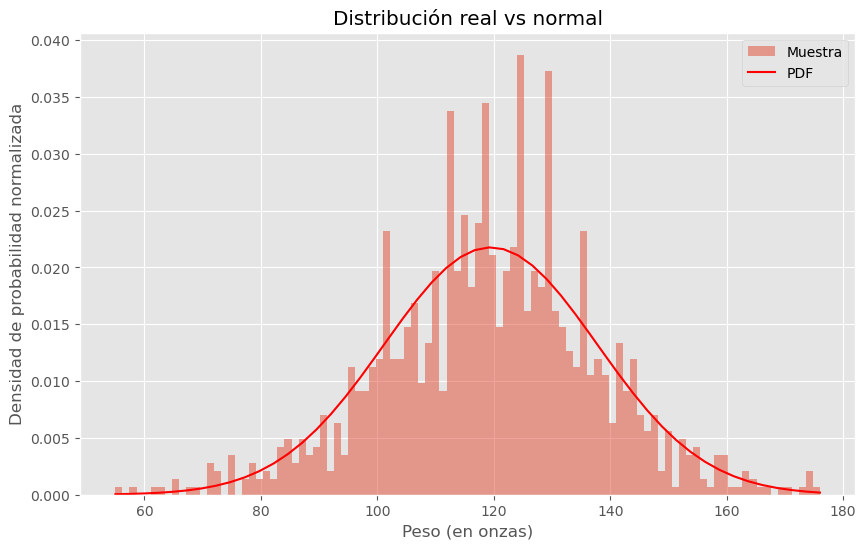

In [33]:
#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.

mu=peso.mean()
sigma=peso.std()
minimo=peso.min()
maximo=peso.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x = np.linspace(minimo, maximo)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de 
#todas las áreas de las barras sea igual a 1, para que podamos representar las probabilidades
plt.hist(peso, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Peso (en onzas)')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución real vs normal')
plt.legend()
plt.show()

In [34]:
#R: En base al histograma de datos reales y la curva normal, podemos decir que los datos si siguen una distribución normal.

In [35]:
#3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos 
#para 5 valores diferentes. Compara con los datos reales.

peso = df['Birth.Weight'].dropna()
valores = np.random.choice(peso, size=5, replace=False) #False selecciona una muestra de tamaño 5 sin repetir valores

for i in valores:
    p_real = percentileofscore(peso, i).round(3)
    p_teorica = (norm.cdf(i, loc = mu, scale = sigma)*100).round(3)
    print(f'El percentil real para {i} es: {p_real}, y el teórico es: {p_teorica}')

El percentil real para 123 es: 57.155, y el teórico es: 57.652
El percentil real para 126 es: 64.14, y el teórico es: 63.933
El percentil real para 111 es: 29.813, y el teórico es: 32.214
El percentil real para 116 es: 40.928, y el teórico es: 42.508
El percentil real para 133 es: 78.748, y el teórico es: 76.992


In [36]:
valores

array([123, 126, 111, 116, 133], dtype=int64)

In [37]:
#R: los percentiles reales y teóricos son bastante similares para los valores aleatorios que se han seleccionado, 
#lo que indica que el modelo de distribución normal se ajusta bien a los datos. Sin embargo, hay algunas diferencias
#entre los percentiles reales y teóricos, especialmente para los valores extremos (87 y 141), 
#lo que indica que el modelo de distribución normal no es perfecto y que hay algunos casos que se desvían de la normalidad.

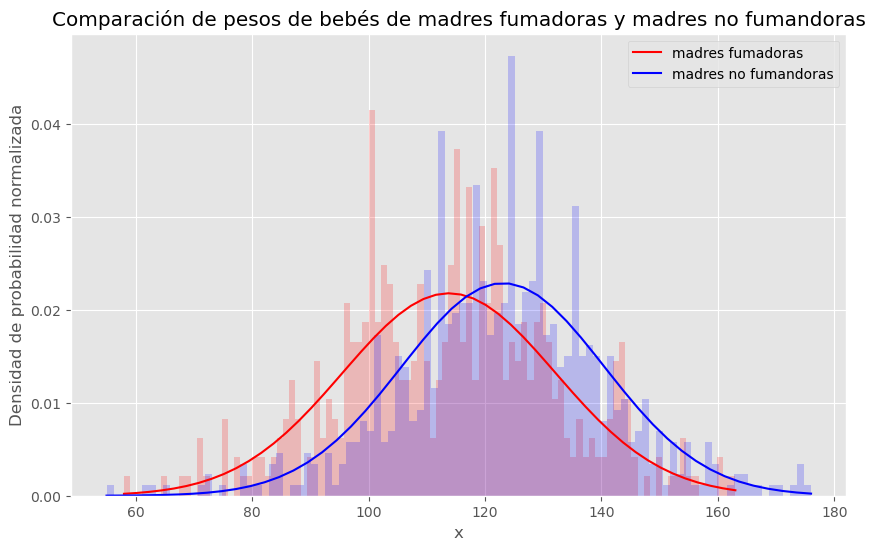

In [38]:
#4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? 
#Explica y construye los modelos correspondientes.

#Filtro por categoría.
madres_fumadoras=df[df['Maternal.Smoker']==True]['Birth.Weight']
madres_no_fumadoras=df[df['Maternal.Smoker']==False]['Birth.Weight']

#Defino una función que permita modelar un conjunto de datos con la distribución normal.
def get_psd(x):
    mu=x.mean()
    sigma=x.std()
    minimo=x.min()
    maximo=x.max()
    x = np.linspace(minimo, maximo)
    pdf = norm.pdf(x, loc=mu, scale=sigma)
    return(x,pdf)

#Realizo la comparación.
x,pdf=get_psd(madres_fumadoras)
plt.plot(x , pdf, color='red', label='madres fumadoras')
x,pdf=get_psd(madres_no_fumadoras)
plt.plot(x , pdf, color='blue', label='madres no fumandoras')
plt.hist(madres_fumadoras, bins=100, density=True, alpha=0.2, color='red')
plt.hist(madres_no_fumadoras, bins=100, density=True, alpha=0.2, color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de pesos de bebés de madres fumadoras y madres no fumandoras')
plt.legend()
plt.show()

In [39]:
#R: En el gráfico, se puede observar que la curva de las madres fumadoras tiene una desviación estándar mayor
#y una variabilidad mayor que la curva de las madres no fumadoras, porque es más plana y corta que la otra.
#Esto significa que los pesos de los bebés de madres fumadoras están más dispersos alrededor de la media,
#y que hay más casos extremos con pesos muy bajos o muy altos. Adicionalmente, se puede observar que 
#la media de los pesos de los bebés de madres no fumadoras es mayor que la media de los pesos de los bebés 
#de madres fumadoras. Esto significa que los bebés de madres no fumadoras tienen un peso medio más alto que 
#los bebés de madres fumadoras, y que sus datos están más concentrados en valores mayores. Por eso, 
#el histograma de las madres no fumadoras está más hacia la derecha que el histograma de las madres fumadoras.

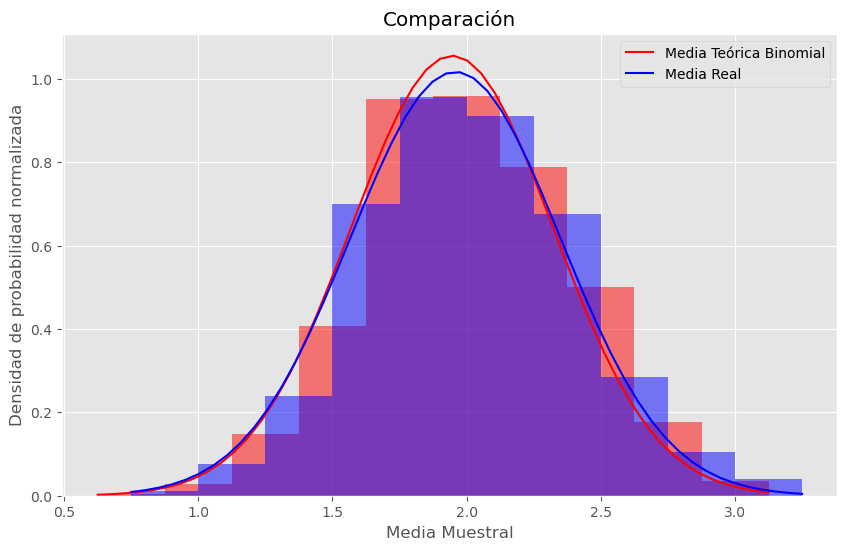

In [40]:
#5. Construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 
#5 madres al azar y observar cuántas fuman. Utilizando este modelo y los datos reales, 
#genera en cada caso 1000 muestras de tamaño 8 con sus respectivas medias muestrales.

datos= df['Maternal.Smoker']
fumadora = np.where(datos, 1, 0)
p = df['Maternal.Smoker'].sum()/len(df)

lista_media_teorica = []

for t in range(1000):
    lista_media_teorica.append(np.mean(np.random.binomial(5,p,8)))

#

lista_media_real = []

for r in range(1000):
    muestra= []	
    for i in range(8):         
        muestra.append(sum(np.random.choice(fumadora, size= 5, replace= False)))
    lista_media_real.append(np.mean(muestra))    
    
       
def get_psd(x):
    x = np.array(x)
    mu=x.mean()
    sigma=x.std()
    minimo=x.min()
    maximo=x.max()
    x = np.linspace(minimo, maximo)
    pdf = norm.pdf(x, loc=mu, scale=sigma)
    return(x,pdf)

x,pdf=get_psd(lista_media_teorica) # obtiene la función de densidad de probabilidad normal para las medias muestrales teóricas
plt.plot(x , pdf, color='red', label='Media Teórica Binomial') # grafica la curva para las medias muestrales teóricas
x,pdf=get_psd(lista_media_real) # obtiene la función de densidad de probabilidad normal para las medias muestrales reales
plt.plot(x , pdf, color='blue', label='Media Real') # grafica la curva para las medias muestrales reales
plt.hist(lista_media_teorica, bins=10, density=True, alpha=0.5, color='red') # grafica el histograma para las medias muestrales teóricas
plt.hist(lista_media_real, bins=10, density=True, alpha=0.5, color='blue') # grafica el histograma para las medias muestrales reales
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación')
plt.legend()
plt.show()

In [41]:
#R: Este gráfico muestra que el modelo normal se ajusta bien al modelo binomial y a los datos reales,
#lo que indica que el teorema del límite central se cumple.
#El teorema del límite central dice "A medida que aumenta el tamaño de la muestra, la distribución de la suma o media se 
#aproxima cada vez más a una distribución normal.", y se puede observar en el gráfico que se ha hecho. Si se observa con
#detención, en las tres distribuciones que se han graficado, la media muestral teórica, la media muestral real y el modelo 
#normal, se verá que tienen una forma similar, con una cima alrededor de la media y una inclinación hacia la derecha. 
#También se verá que tienen un centro similar, con medias muy cercanas entre sí. Esto indica que la distribución de la suma
#o media se aproxima a una distribución normal a medida que aumenta el tamaño de la muestra.